In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

#给图像添加椒盐噪声
def addSaltAndPepper(src, percentage):
    #NoiseImg = src         #使用此语句传递的是地址，程序会出错
    NoiseImg = src.copy()   #在此要使用copy函数，否则src和主程序中的img都会跟着改变
    NoiseNum = int(percentage * src.shape[0] * src.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, src.shape[0] - 1)  #产生[0, src.shape[0] - 1]之间随机整数
        randY = random.randint(0, src.shape[1] - 1)
        if random.randint(0, 1) == 0:  
            NoiseImg[randX, randY] = 0
        else:
            NoiseImg[randX, randY] = 255
    return NoiseImg

In [2]:
#给图像添加胡椒噪声
def addPepper(src, percentage):
    #NoiseImg = src         #使用此语句传递的是地址，程序会出错
    NoiseImg = src.copy()   #在此要使用copy函数，否则src和主程序中的img都会跟着改变
    NoiseNum = int(percentage * src.shape[0] * src.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, src.shape[0] - 1)  #产生[0, src.shape[0] - 1]之间随机整数
        randY = random.randint(0, src.shape[1] - 1)
        NoiseImg[randX, randY] = 0
    return NoiseImg

In [3]:
#给图像添加盐噪声
def addSalt(src, percentage):
    #NoiseImg = src         #使用此语句传递的是地址，程序会出错
    NoiseImg = src.copy()   #在此要使用copy函数，否则src和主程序中的img都会跟着改变
    NoiseNum = int(percentage * src.shape[0] * src.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, src.shape[0] - 1)  #产生[0, src.shape[0] - 1]之间随机整数
        randY = random.randint(0, src.shape[1] - 1)
        NoiseImg[randX, randY] = 255
    return NoiseImg

In [4]:
#给图像添加高斯噪声
def addGaussianNoise(src,means,sigma):
    NoiseImg=src/src.max()
    rows=NoiseImg.shape[0]
    cols=NoiseImg.shape[1]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(means,sigma) 
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    NoiseImg=np.uint8(NoiseImg*255)
    return NoiseImg

In [5]:
def arithmetic_mean(input_image, filter_size):
    '''
    算术均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):
            output_image[i, j] =np.sum(filter_template * input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]) / (filter_size ** 2)
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return output_image

In [6]:
# 几何均值滤波
def geometric_mean(input_image, filter_size):
    '''
    几何均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    input_image_cp=input_image_cp/input_image_cp.max()
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):
            temp=input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]
            temp1=temp.reshape(1,-1)
            output_image[i,j] =pow(temp1.prod(),1/(filter_size**2))
#             print(temp1,output_image[i,j])
#             input()
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return np.uint8(output_image*255)

In [7]:
# 谐波滤波
def harmonic_mean(input_image, filter_size):
    '''
    谐波均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):            
            output_image[i, j] =(filter_size ** 2)/np.sum(1/input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]) 
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return output_image

In [8]:
# 逆谐波滤波
def contraharmonic_mean(input_image, filter_size,Q):
    '''
    逆谐波均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
#     Q=float(Q)   #当Q为负时，必须转成浮点数
    Q1=Q+1
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):            
            output_image[i, j] =np.sum(input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]**Q1)/np.sum(input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]**Q) 
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return output_image

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in power


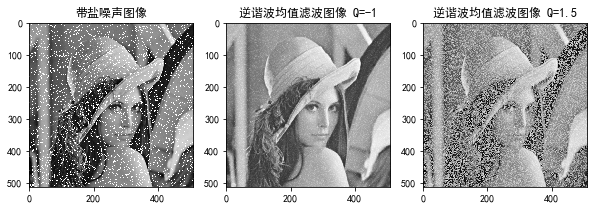

In [11]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

#给图像添加盐噪声
def addSalt(src, percentage):
    #NoiseImg = src         #使用此语句传递的是地址，程序会出错
    NoiseImg = src.copy()   #在此要使用copy函数，否则src和主程序中的img都会跟着改变
    NoiseNum = int(percentage * src.shape[0] * src.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, src.shape[0] - 1)  #产生[0, src.shape[0] - 1]之间随机整数
        randY = random.randint(0, src.shape[1] - 1)
        NoiseImg[randX, randY] = 255
    return NoiseImg

# 逆谐波滤波
def contraharmonic_mean(input_image, filter_size,Q):
    '''
    逆谐波均值滤波器
    :param input_image: 输入图像
    :param filter_size: 滤波器大小
    :return: 输出图像

    注：此实现滤波器大小必须为奇数且 >= 3
    '''
    input_image_cp = np.copy(input_image)  # 输入图像的副本
    filter_template = np.ones((filter_size, filter_size))  # 空间滤波器模板
    pad_num = int((filter_size - 1) / 2)  # 输入图像需要填充的尺寸
    input_image_cp = np.pad(input_image_cp, (pad_num, pad_num), mode="constant", constant_values=0)# 填充输入图像
    m, n = input_image_cp.shape  # 获取填充后的输入图像的大小
    output_image = np.copy(input_image_cp)  # 输出图像
#     Q=float(Q)   #当Q为负时，必须转成浮点数
    Q1=Q+1
    # 空间滤波
    for i in range(pad_num, m - pad_num):
        for j in range(pad_num, n - pad_num):            
            output_image[i, j] =np.sum(input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]**Q1)/np.sum(input_image_cp[i - pad_num:i + pad_num + 1, j - pad_num:j + pad_num + 1]**Q) 
    output_image = output_image[pad_num:m - pad_num, pad_num:n - pad_num]  # 裁剪
    return output_image

if __name__ == '__main__':
    img = cv2.imread(r'..\img\Lenna.png', flags=0)
    imgNoise = addSalt(img,0.1)#给图像添加盐噪声
#     img_A=arithmetic_mean(imgNoise, 3)
    img_dn1=contraharmonic_mean(imgNoise, 3,-1.0)
    img_dn2=contraharmonic_mean(imgNoise, 3,1.5)  
    
    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(imgNoise,cmap='gray')
    plt.title("带盐噪声图像")
    plt.subplot(132)
    plt.imshow(img_dn1,cmap='gray')
    plt.title("逆谐波均值滤波图像 Q=-1")    
    plt.subplot(133)
    plt.imshow(img_dn2,cmap='gray')
    plt.title("逆谐波均值滤波图像 Q=1.5")       
    plt.show()

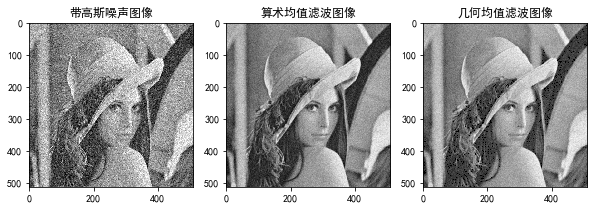

In [13]:
if __name__ == '__main__':
    img = cv2.imread(r'..\img\Lenna.png', flags=0)
    imgNoise = addGaussianNoise(img,0,0.1)#给图像添加高斯噪声
    img_A=arithmetic_mean(imgNoise, 3)
    img_G=geometric_mean(imgNoise, 3)

            
    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(imgNoise,cmap='gray')
    plt.title("带高斯噪声图像")
    plt.subplot(132)
    plt.imshow(img_A,cmap='gray')
    plt.title("算术均值滤波图像")    
    plt.subplot(133)
    plt.imshow(img_G,cmap='gray')
    plt.title("几何均值滤波图像")       
    plt.show()